In [1]:
import pandas as pd
import pickle
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code

kidney_disease_df = pd.read_csv('kidney.csv')




# No missing percentage

### Without Shuffle

/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

Final Confusion Matrix (Aggregated Across All Folds):


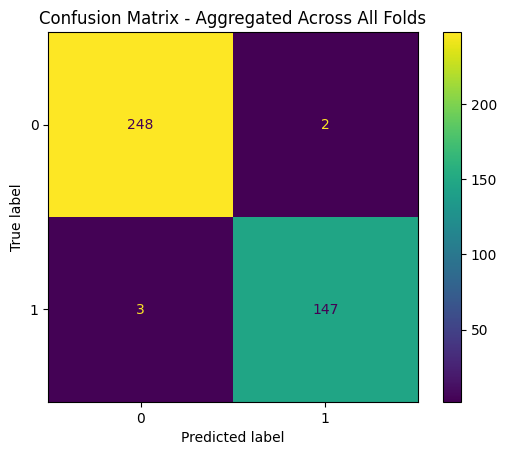

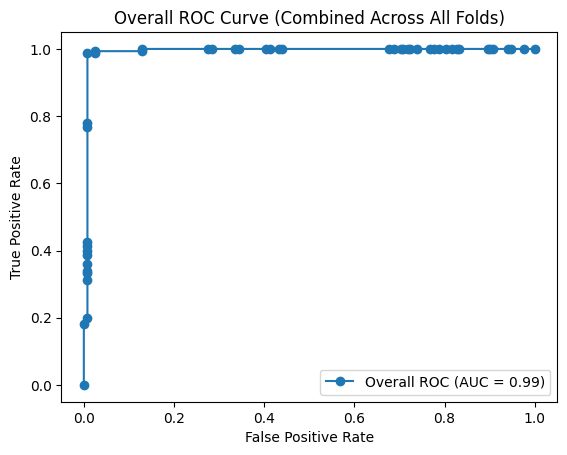

Overall AUC (Combined Across All Folds): 0.99


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Encode categorical variables
X = df.drop('classification', axis=1)
y = df['classification']
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Impute missing values
knn_imputer = KNNImputer(n_neighbors=10)
X_encoded_imputed = knn_imputer.fit_transform(X_encoded)

# Define model and evaluation settings
model = AdaBoostClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results across folds
all_y_true = []
all_y_pred = []
all_y_pred_proba = []

for train_index, test_index in kf.split(X_encoded_imputed):
    X_train, X_test = X_encoded_imputed[train_index], X_encoded_imputed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is sliced correctly for indices
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store predictions and predicted probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Append results to aggregate lists
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_pred_proba.extend(y_pred_proba)

# Final Confusion Matrix
overall_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Final Confusion Matrix (Aggregated Across All Folds):")
disp = ConfusionMatrixDisplay(confusion_matrix=overall_conf_matrix)
disp.plot()
plt.title("Confusion Matrix - Aggregated Across All Folds")
plt.show()

# Calculate and plot a single ROC curve and AUC using all_y_true and all_y_pred_proba
fpr, tpr, _ = roc_curve(all_y_true, all_y_pred_proba)
overall_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, marker = 'o', label=f'Overall ROC (AUC = {overall_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve (Combined Across All Folds)')
plt.legend(loc="lower right")
plt.show()

print(f'Overall AUC (Combined Across All Folds): {overall_auc:.2f}')


In [4]:
import pandas as pd

# Assuming all_y_true, all_y_pred, and all_y_pred_proba have been populated
# after the cross-validation loop

# Create a DataFrame with columns for true labels, predictions, and predicted probabilities
results_df = pd.DataFrame({
    'True Label': all_y_true,
    'Predicted Label': all_y_pred,
    'original label':y,
    'Predicted Probability': all_y_pred_proba
})

# Display the DataFrame to see the values column-wise
results_df


,True Label,Predicted Label,original label,Predicted Probability
0,0,0,0,0.325504
1,0,0,0,0.000040
2,0,0,0,0.000184
3,0,0,0,0.000078
4,0,0,0,0.003211
...,...,...,...,...
395,1,1,1,0.948876
396,1,1,1,0.907973
397,1,1,1,0.853920
398,1,1,1,0.894925


In [21]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import KNNImputer
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import LabelEncoder
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load and preprocess the dataset
# file_path = 'kidney.csv'
# df = pd.read_csv(file_path)
# df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
# df['cad'] = df['cad'].replace('\tno', 'no')
# df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})
# df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# # Fill NaN values for categorical columns with the most frequent value (mode)
# cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# # Drop unnecessary column (e.g., 'id')
# if 'id' in df.columns:
#     df = df.drop('id', axis=1)

# # Encode categorical variables
# X = df.drop('classification', axis=1)
# y = df['classification']
# X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# # Impute missing values
# knn_imputer = KNNImputer(n_neighbors=10)
# X_encoded_imputed = knn_imputer.fit_transform(X_encoded)

# # Define model and evaluation settings
# model = AdaBoostClassifier()
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize dictionaries to store results with original indices
# y_true_dict = {}
# y_pred_dict = {}
# y_pred_proba_dict = {}

# for train_index, test_index in kf.split(X_encoded_imputed):
#     X_train, X_test = X_encoded_imputed[train_index], X_encoded_imputed[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is sliced correctly for indices
    
#     # Fit the model
#     model.fit(X_train, y_train)
    
#     # Store predictions and predicted probabilities with original indices
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
    
#     for idx, true_val, pred_val, pred_proba in zip(test_index, y_test, y_pred, y_pred_proba):
#         y_true_dict[idx] = true_val
#         y_pred_dict[idx] = pred_val
#         y_pred_proba_dict[idx] = pred_proba

# # Convert dictionaries to a DataFrame
# results_df = pd.DataFrame({
#     'Original Index': list(y_true_dict.keys()),
#     'True Value': list(y_true_dict.values()),
#     'Predicted Value': list(y_pred_dict.values()),
#     'Predicted Probability': list(y_pred_proba_dict.values())
# }).sort_values(by='Original Index')



# # Calculate and plot confusion matrix and ROC curve
# overall_conf_matrix = confusion_matrix(results_df['True Value'], results_df['Predicted Value'])
# print("Final Confusion Matrix (Aggregated Across All Folds):")
# disp = ConfusionMatrixDisplay(confusion_matrix=overall_conf_matrix)
# disp.plot()
# plt.title("Confusion Matrix - Aggregated Across All Folds")
# plt.show()

# # Calculate and plot a single ROC curve and AUC
# fpr, tpr, _ = roc_curve(results_df['True Value'], results_df['Predicted Probability'])
# overall_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr, label=f'Overall ROC (AUC = {overall_auc:.2f})')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Overall ROC Curve (Combined Across All Folds)')
# plt.legend(loc="lower right")
# plt.show()

# print(f'Overall AUC (Combined Across All Folds): {overall_auc:.2f}')
# Display the aggregated results
# print("Aggregated Results with Original Indices:")
# results_df


### With 100 Shuffle

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

# Assume X_encoded_imputed and y are defined as your feature matrix and target labels

# Define model
model = AdaBoostClassifier() 
n_splits = 5
n_repeats = 100

# Initialize a DataFrame to store results across 100 runs
all_results = pd.DataFrame(columns=['Repeat', 'Fold', 'Original Index', 'True Label', 'Predicted Label', 'Predicted Probability'])

# Repeat the process 100 times
for repeat in range(1, n_repeats + 1):
    # Shuffle the full dataset and store the mapping to original indices
    X_shuffled, y_shuffled = shuffle(X_encoded_imputed, y, random_state=repeat)
    original_indices = y_shuffled.index  # Track the original indices after shuffling
    
    # Initialize KFold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)
    
    # Dictionary to store results for the current repeat
    repeat_results_dict = {
        'Repeat': [],
        'Fold': [],
        'Original Index': [],
        'True Label': [],
        'Predicted Label': [],
        'Predicted Probability': []
    }

    # Perform KFold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled), start=1):
        X_train, X_test = X_shuffled[train_index], X_shuffled[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict and get probabilities
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Map back to original indices and store results
        for i, idx in enumerate(y_test.index):
            repeat_results_dict['Repeat'].append(repeat)
            repeat_results_dict['Fold'].append(fold)
            repeat_results_dict['Original Index'].append(original_indices[idx])  # Original index in y
            repeat_results_dict['True Label'].append(y_test.iloc[i])
            repeat_results_dict['Predicted Label'].append(y_pred[i])
            repeat_results_dict['Predicted Probability'].append(y_pred_proba[i])

    # Convert the current repeat's results to a DataFrame and append to all_results
    repeat_results_df = pd.DataFrame(repeat_results_dict)
    all_results = pd.concat([all_results, repeat_results_df], ignore_index=True)

# Sort all results by Repeat, Fold, and Original Index for organized viewing
all_results = all_results.sort_values(by=['Repeat', 'Fold', 'Original Index']).reset_index(drop=True)




/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/envs/kidney/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

      Repeat Fold Original Index True Label Predicted Label  \
0          1    1              2          1               1   
1          1    1              7          1               1   
2          1    1              8          0               0   
3          1    1             34          0               0   
4          1    1             40          0               0   
...      ...  ...            ...        ...             ...   
39995    100    5            372          0               0   
39996    100    5            384          0               0   
39997    100    5            389          1               1   
39998    100    5            395          1               1   
39999    100    5            398          1               1   

       Predicted Probability  
0               9.145035e-01  
1               9.328756e-01  
2               7.216338e-03  
3               7.785465e-04  
4               5.555548e-05  
...                      ...  
39995           1.115121e-

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

In [34]:
all_results.head(401)

,Repeat,Fold,Original Index,True Label,Predicted Label,Predicted Probability
0,1,1,2,1,1,9.145035e-01
1,1,1,7,1,1,9.328756e-01
2,1,1,8,0,0,7.216338e-03
3,1,1,34,0,0,7.785465e-04
4,1,1,40,0,0,5.555548e-05
...,...,...,...,...,...,...
396,1,5,377,0,0,6.431250e-08
397,1,5,378,0,0,8.343624e-07
398,1,5,382,0,0,1.155014e-04
399,1,5,391,0,0,1.199428e-05


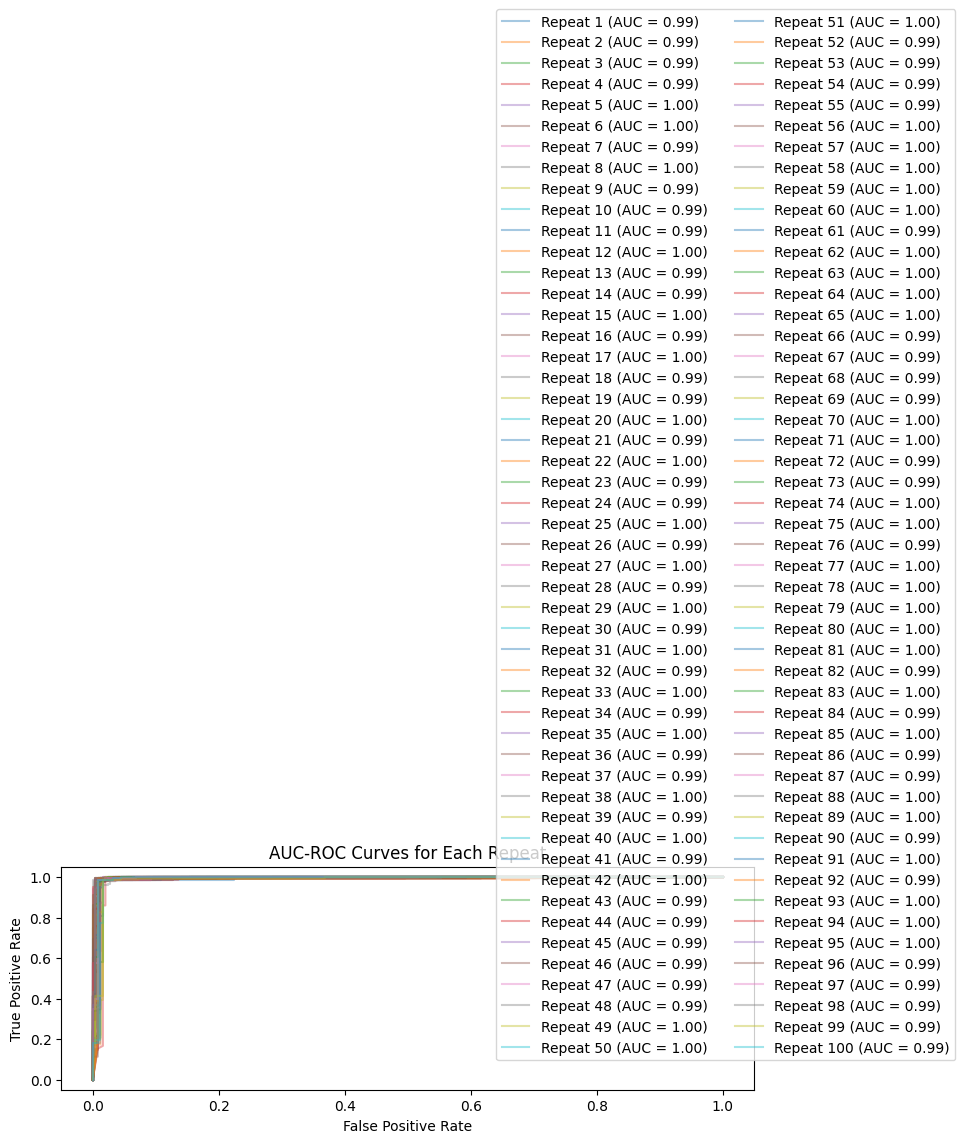

AUC scores for each repeat: [0.9854399999999999, 0.9936799999999999, 0.9944, 0.9851733333333335, 0.9969333333333334, 0.9964, 0.9926933333333333, 0.9962133333333334, 0.99256, 0.9921866666666667, 0.9944000000000001, 0.99608, 0.9881733333333333, 0.99236, 0.9952, 0.9912266666666666, 0.99648, 0.9935733333333332, 0.98668, 0.9952, 0.9923733333333333, 0.9953066666666667, 0.9920266666666666, 0.9903866666666665, 0.9981599999999999, 0.9921733333333334, 0.9980800000000001, 0.9918666666666667, 0.9965333333333334, 0.9943733333333334, 0.9952799999999999, 0.9942666666666666, 0.9952666666666666, 0.99072, 0.9962933333333334, 0.9884799999999999, 0.9923599999999999, 0.9981066666666667, 0.9880933333333333, 0.9960000000000001, 0.9899466666666666, 0.9972799999999999, 0.9898666666666666, 0.9912, 0.9921066666666666, 0.9880266666666666, 0.9930133333333333, 0.9922933333333332, 0.996, 0.9964, 0.996, 0.98896, 0.9941066666666666, 0.9940533333333333, 0.99324, 0.9982133333333334, 0.9992800000000001, 0.996826666666666

In [6]:
# Initialize a list to store AUC scores for each repeat
auc_scores = []

# Plotting the AUC-ROC for each repeat
plt.figure(figsize=(10, 8))
for repeat in range(1, n_repeats + 1):
    # Filter the results for the current repeat
    repeat_data = all_results[all_results['Repeat'] == repeat]
    
    # Extract true labels and predicted probabilities and ensure they are numeric
    y_true_repeat = pd.to_numeric(repeat_data['True Label'], errors='coerce')
    y_pred_proba_repeat = pd.to_numeric(repeat_data['Predicted Probability'], errors='coerce')
    
    # Check for binary format in y_true
    unique_labels = y_true_repeat.unique()
    if len(unique_labels) > 2:
        raise ValueError(f"Unexpected labels in y_true: {unique_labels}. Ensure binary labels.")

    # Calculate ROC curve and AUC for this repeat
    fpr, tpr, _ = roc_curve(y_true_repeat, y_pred_proba_repeat)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Plot the ROC curve for this repeat
    plt.plot(fpr, tpr, label=f'Repeat {repeat} (AUC = {roc_auc:.2f})', alpha=0.4)  # Use alpha for transparency

# Final plot adjustments
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Each Repeat')
plt.legend(loc="lower right", bbox_to_anchor=(1.3, 0.1), ncol=2)  # Adjust legend position if too crowded
plt.tight_layout()
plt.show()

# Optional: Display or analyze AUC scores for each repeat
print("AUC scores for each repeat:", auc_scores)


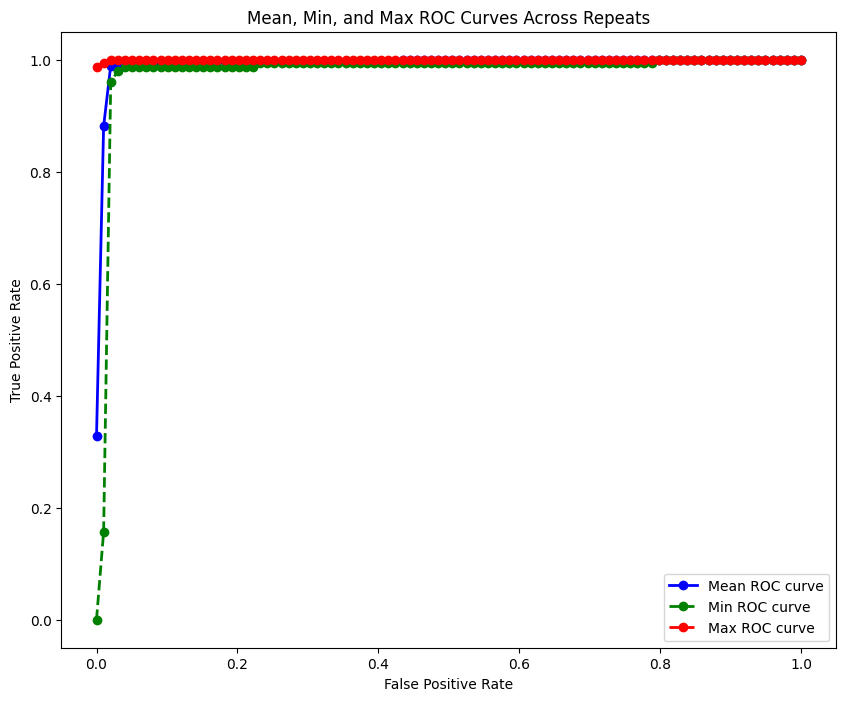

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of points to interpolate along the FPR axis
n_points = 100
fpr_grid = np.linspace(0, 1, n_points)

# Initialize list to store interpolated TPR values for each repeat
tpr_interpolated = []
auc_scores = []

# Repeat loop to calculate ROC and interpolate TPR
for repeat in range(1, n_repeats + 1):
    # Filter the results for the current repeat
    repeat_data = all_results[all_results['Repeat'] == repeat]
    
    # Extract true labels and predicted probabilities
    y_true_repeat = pd.to_numeric(repeat_data['True Label'], errors='coerce')
    y_pred_proba_repeat = pd.to_numeric(repeat_data['Predicted Probability'], errors='coerce')
    
    # Calculate ROC curve and AUC for this repeat
    fpr, tpr, _ = roc_curve(y_true_repeat, y_pred_proba_repeat)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR values to align with the common FPR grid
    tpr_interpolated.append(np.interp(fpr_grid, fpr, tpr))

# Convert interpolated TPR values to a DataFrame for easy analysis
tpr_interpolated = np.array(tpr_interpolated)
tpr_df = pd.DataFrame(tpr_interpolated, columns=fpr_grid)

# Calculate mean, min, and max of TPR at each FPR point across repeats
tpr_mean = tpr_df.mean(axis=0)
tpr_min = tpr_df.min(axis=0)
tpr_max = tpr_df.max(axis=0)

# Plot the mean, min, and max ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_grid, tpr_mean,marker='o', color='blue', label='Mean ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_min,marker='o', color='green', linestyle='--', label='Min ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_max, marker='o',color='red', linestyle='--', label='Max ROC curve', linewidth=2)

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean, Min, and Max ROC Curves Across Repeats')
plt.legend(loc="lower right")
plt.show()


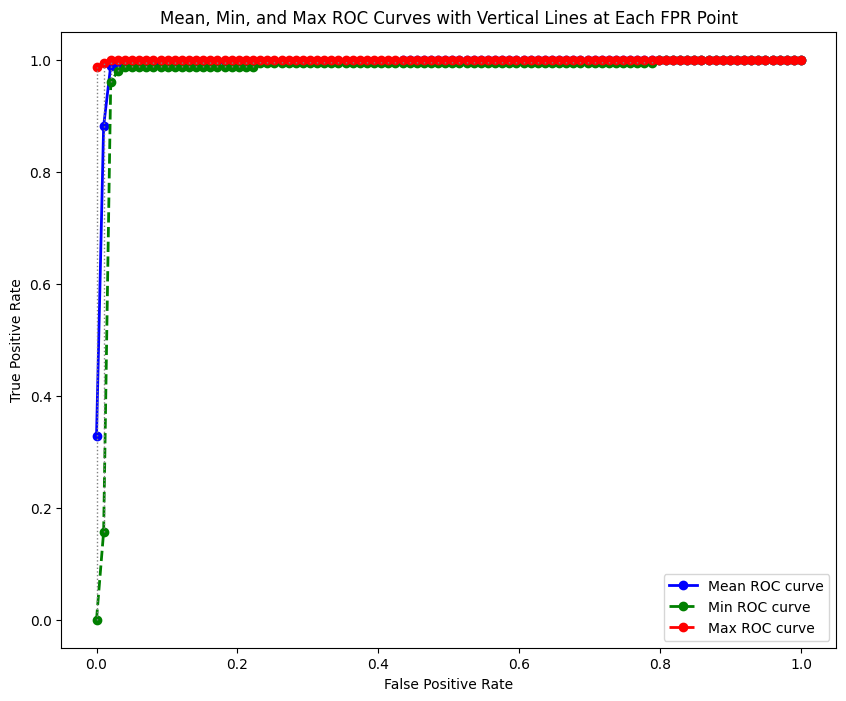

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of points to interpolate along the FPR axis
n_points = 100
fpr_grid = np.linspace(0, 1, n_points)

# Initialize list to store interpolated TPR values for each repeat
tpr_interpolated = []
auc_scores = []

# Repeat loop to calculate ROC and interpolate TPR
for repeat in range(1, n_repeats + 1):
    # Filter the results for the current repeat
    repeat_data = all_results[all_results['Repeat'] == repeat]
    
    # Extract true labels and predicted probabilities
    y_true_repeat = pd.to_numeric(repeat_data['True Label'], errors='coerce')
    y_pred_proba_repeat = pd.to_numeric(repeat_data['Predicted Probability'], errors='coerce')
    
    # Calculate ROC curve and AUC for this repeat
    fpr, tpr, _ = roc_curve(y_true_repeat, y_pred_proba_repeat)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR values to align with the common FPR grid
    tpr_interpolated.append(np.interp(fpr_grid, fpr, tpr))

# Convert interpolated TPR values to a DataFrame for easy analysis
tpr_interpolated = np.array(tpr_interpolated)
tpr_df = pd.DataFrame(tpr_interpolated, columns=fpr_grid)

# Calculate mean, min, and max of TPR at each FPR point across repeats
tpr_mean = tpr_df.mean(axis=0)
tpr_min = tpr_df.min(axis=0)
tpr_max = tpr_df.max(axis=0)

# Plot the mean, min, and max ROC curves with vertical lines for each FPR point
plt.figure(figsize=(10, 8))
plt.plot(fpr_grid, tpr_mean, marker='o', color='blue', label='Mean ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_min, marker='o', color='green', linestyle='--', label='Min ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_max, marker='o', color='red', linestyle='--', label='Max ROC curve', linewidth=2)

# Adding vertical lines at each FPR point to show the range between min and max TPR values
for i in range(len(fpr_grid)):
    plt.vlines(x=fpr_grid[i], ymin=tpr_min.iloc[i], ymax=tpr_max.iloc[i], colors='grey', linestyles='dotted', linewidth=1)

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean, Min, and Max ROC Curves with Vertical Lines at Each FPR Point')
plt.legend(loc="lower right")
plt.show()


# Missing with Single Imputation

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)

# Clean categorical columns by replacing incorrect values
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Rename columns to more descriptive names before defining X and y
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'peda_edema',
    'ane': 'anemia'
}, inplace=True)

# Separate features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Handle categorical variables by encoding them (if they are not numeric)
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




# Function to randomly introduce missing values
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
    X_missing[missing_mask] = np.nan
    return X_missing

# Introduce 10%, 20%, and 30% missing values in the test set
X_test_10_missing = introduce_missingness(X_test, 10)
X_test_20_missing = introduce_missingness(X_test, 20)
X_test_30_missing = introduce_missingness(X_test, 30)

# Impute missing values using KNN


In [62]:
X_encoded

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,32,72,34,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,NaN,...,11.3,26,56,49,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,19,70,49,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,20,62,19,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,23,68,27,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,35,62,30,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,42,72,44,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,37,61,36,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,39,67,41,0,0,0,0,0,0


In [63]:
X_test_20_missing

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia
209,19.0,NaN,1.020,0.0,0.0,1.0,1.0,0.0,0.0,NaN,...,NaN,44.0,64.0,49.0,0.0,0.0,0.0,0.0,0.0,NaN
280,47.0,80.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,93.0,...,13.3,40.0,NaN,34.0,0.0,NaN,0.0,0.0,0.0,0.0
33,60.0,NaN,1.020,2.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,17.0,NaN,49.0,NaN,0.0,NaN,1.0,0.0,0.0
210,59.0,100.0,NaN,4.0,2.0,1.0,1.0,0.0,NaN,255.0,...,7.3,8.0,90.0,NaN,1.0,1.0,1.0,NaN,0.0,1.0
93,NaN,100.0,NaN,3.0,NaN,0.0,0.0,1.0,0.0,295.0,...,9.2,NaN,65.0,12.0,1.0,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NaN,110.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,106.0,...,NaN,14.0,46.0,4.0,1.0,0.0,NaN,0.0,0.0,1.0
227,57.0,80.0,1.015,0.0,0.0,1.0,1.0,0.0,0.0,120.0,...,11.3,24.0,67.0,18.0,1.0,1.0,0.0,0.0,NaN,0.0
369,75.0,70.0,1.020,NaN,0.0,1.0,NaN,0.0,0.0,107.0,...,13.6,34.0,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0
176,21.0,90.0,1.010,4.0,0.0,NaN,0.0,1.0,1.0,107.0,...,8.3,NaN,NaN,19.0,NaN,0.0,0.0,0.0,NaN,1.0


In [64]:
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values in the training set
X_train_imputed = knn_imputer.fit_transform(X_train)

# Impute missing values in all test sets using KNN
X_test_10_imputed = knn_imputer.fit_transform(X_test_10_missing)
X_test_20_imputed = knn_imputer.fit_transform(X_test_20_missing)
X_test_30_imputed = knn_imputer.fit_transform(X_test_30_missing)

# Train a Random Forest model on the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)



# Evaluate model on the 10%, 20%, and 30% missing test sets (after imputation)
y_pred_10_missing = model.predict(X_test_10_imputed)
accuracy_10_missing = accuracy_score(y_test, y_pred_10_missing)

y_pred_20_missing = model.predict(X_test_20_imputed)
accuracy_20_missing = accuracy_score(y_test, y_pred_20_missing)

y_pred_30_missing = model.predict(X_test_30_imputed)
accuracy_30_missing = accuracy_score(y_test, y_pred_30_missing)
# Evaluate model on the fully imputed test set (100% features, after ensuring no NaN)
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Display accuracy results
accuracy_results = {
    '100% Features (Original Test Set)': accuracy_original,
    '10% Missing Features': accuracy_10_missing,
    '20% Missing Features': accuracy_20_missing,
    '30% Missing Features': accuracy_30_missing
}


accuracy_results


/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'100% Features (Original Test Set)': 1.0,
 '10% Missing Features': 0.9625,
 '20% Missing Features': 0.95,
 '30% Missing Features': 0.975}

In [66]:
# Redefine models
# Dictionary to hold models and their names
models = {
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "cat_boost_model": CatBoostClassifier(verbose=0, random_state=42),  # Suppress output for CatBoost
    "knn_model": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "xgb_boost_model": xgb.XGBClassifier(random_state=42),
    "extra_tree_model": ExtraTreesClassifier(random_state=42)
}

X_test_imputed = knn_imputer.transform(X_test)
# Store the accuracy results for each model and missingness level (including full features)
accuracy_results = {"Model": [], "Full Features": [], "10% Missing": [], "20% Missing": [], "30% Missing": []}

# Train each model and compute accuracy for each test set with different levels of missing data
for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)  # Train on the imputed training data
    
    # Predict and compute accuracy for full features (no missingness)
    acc_full = accuracy_score(y_test, model.predict(X_test_imputed))
    
    # Predict and compute accuracy for each imputed test set with missing data
    acc_10 = accuracy_score(y_test, model.predict(X_test_10_imputed))
    acc_20 = accuracy_score(y_test, model.predict(X_test_20_imputed))
    acc_30 = accuracy_score(y_test, model.predict(X_test_30_imputed))
    
    # Append results
    accuracy_results["Model"].append(model_name)
    accuracy_results["Full Features"].append(acc_full)
    accuracy_results["10% Missing"].append(acc_10)
    accuracy_results["20% Missing"].append(acc_20)
    accuracy_results["30% Missing"].append(acc_30)

# Convert results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Full Features,10% Missing,20% Missing,30% Missing
0,Ada Boost,0.9875,0.9750,0.9750,0.9625
1,cat_boost_model,0.9875,0.9875,0.9750,0.9625
2,knn_model,0.8500,0.8500,0.8375,0.7875
3,Random Forest,1.0000,0.9625,0.9500,0.9750
4,xgb_boost_model,0.9875,0.9625,0.9375,0.9625
5,extra_tree_model,1.0000,0.9750,0.9875,0.9875


# Missing with Multiple Imputation

In [70]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)

# Clean categorical columns by replacing incorrect values
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Rename columns to more descriptive names before defining X and y
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'peda_edema',
    'ane': 'anemia'
}, inplace=True)

# Separate features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Handle categorical variables by encoding them (if they are not numeric)
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to randomly introduce missing values
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
    X_missing[missing_mask] = np.nan
    return X_missing

# Introduce 10%, 20%, and 30% missing values in the test set
X_test_10_missing = introduce_missingness(X_test, 10)
X_test_20_missing = introduce_missingness(X_test, 20)
X_test_30_missing = introduce_missingness(X_test, 30)

# Define imputing techniques
knn_imputer = KNNImputer(n_neighbors=10)
mean_imputer = SimpleImputer(strategy='mean')
iterative_imputer = IterativeImputer(random_state=42)

# Impute missing values in the training set for all methods
X_train_knn = knn_imputer.fit_transform(X_train)
X_train_mean = mean_imputer.fit_transform(X_train)
X_train_iter = iterative_imputer.fit_transform(X_train)

# Impute missing values in all test sets using all methods
X_test_knn = knn_imputer.transform(X_test)
X_test_mean = mean_imputer.transform(X_test)
X_test_iter = iterative_imputer.transform(X_test)

X_test_10_knn = knn_imputer.transform(X_test_10_missing)
X_test_10_mean = mean_imputer.transform(X_test_10_missing)
X_test_10_iter = iterative_imputer.transform(X_test_10_missing)

X_test_20_knn = knn_imputer.transform(X_test_20_missing)
X_test_20_mean = mean_imputer.transform(X_test_20_missing)
X_test_20_iter = iterative_imputer.transform(X_test_20_missing)

X_test_30_knn = knn_imputer.transform(X_test_30_missing)
X_test_30_mean = mean_imputer.transform(X_test_30_missing)
X_test_30_iter = iterative_imputer.transform(X_test_30_missing)

# Organize the imputation methods
imputation_methods = {
    "KNN Imputer": {
        "X_train": X_train_knn,
        "X_test_full": X_test_knn,
        "X_test_10": X_test_10_knn,
        "X_test_20": X_test_20_knn,
        "X_test_30": X_test_30_knn
    },
    "Mean Imputer": {
        "X_train": X_train_mean,
        "X_test_full": X_test_mean,
        "X_test_10": X_test_10_mean,
        "X_test_20": X_test_20_mean,
        "X_test_30": X_test_30_mean
    },
    "Iterative Imputer": {
        "X_train": X_train_iter,
        "X_test_full": X_test_iter,
        "X_test_10": X_test_10_iter,
        "X_test_20": X_test_20_iter,
        "X_test_30": X_test_30_iter
    }
}

# Define models
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Store results for each imputation method
results = []
for method_name, datasets in imputation_methods.items():
    for model_name, model in models.items():
        model.fit(datasets["X_train"], y_train)
        
        # Get accuracies for full features and different levels of missingness
        acc_full = accuracy_score(y_test, model.predict(datasets["X_test_full"]))
        acc_10 = accuracy_score(y_test, model.predict(datasets["X_test_10"]))
        acc_20 = accuracy_score(y_test, model.predict(datasets["X_test_20"]))
        acc_30 = accuracy_score(y_test, model.predict(datasets["X_test_30"]))
        
        # Append results
        results.append({
            "Imputation Method": method_name,
            "Model": model_name,
            "Full Features": acc_full,
            "10% Missing": acc_10,
            "20% Missing": acc_20,
            "30% Missing": acc_30
        })
# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Imputation Method,Model,Full Features,10% Missing,20% Missing,30% Missing
0,KNN Imputer,AdaBoost,0.9875,0.9625,0.9875,0.9500
1,KNN Imputer,CatBoost,0.9875,0.9625,0.9875,0.9750
2,KNN Imputer,KNeighbors,0.8375,0.8125,0.8375,0.8000
3,KNN Imputer,Random Forest,1.0000,0.9875,1.0000,0.9500
4,KNN Imputer,XGBoost,0.9875,0.9625,0.9875,0.9500
5,KNN Imputer,Extra Trees,0.9875,0.9875,0.9875,0.9500
6,Mean Imputer,AdaBoost,1.0000,0.9875,0.9875,0.9875
7,Mean Imputer,CatBoost,0.9875,0.9875,0.9750,0.9375
8,Mean Imputer,KNeighbors,0.8875,0.8500,0.7875,0.7625
9,Mean Imputer,Random Forest,1.0000,1.0000,0.9625,0.8875


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate sensitivity (recall) and specificity
def calculate_specificity(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    return specificity

# Store the metrics (accuracy, sensitivity, specificity, F1) for each model and imputation method
metrics_results = {"Imputation Method": [], "Model": [], "Accuracy": [], "Sensitivity (Recall)": [], "Specificity": [], "F1-Score": []}

for method_name, datasets in imputation_methods.items():
    for model_name, model in models.items():
        # Train model with full feature set (no missingness)
        model.fit(datasets["X_train"], y_train)
        y_pred = model.predict(datasets["X_test_full"])

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        specificity = calculate_specificity(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append results
        metrics_results["Imputation Method"].append(method_name)
        metrics_results["Model"].append(model_name)
        metrics_results["Accuracy"].append(acc)
        metrics_results["Sensitivity (Recall)"].append(sensitivity)
        metrics_results["Specificity"].append(specificity)
        metrics_results["F1-Score"].append(f1)

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Imputation Method,Model,Accuracy,Sensitivity (Recall),Specificity,F1-Score
0,KNN Imputer,AdaBoost,0.9875,1.000000,0.980769,0.982456
1,KNN Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456
2,KNN Imputer,KNeighbors,0.8375,0.928571,0.788462,0.800000
3,KNN Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000
4,KNN Imputer,XGBoost,0.9875,1.000000,0.980769,0.982456
5,KNN Imputer,Extra Trees,0.9875,1.000000,0.980769,0.982456
6,Mean Imputer,AdaBoost,1.0000,1.000000,1.000000,1.000000
7,Mean Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456
8,Mean Imputer,KNeighbors,0.8875,1.000000,0.826923,0.861538
9,Mean Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000


/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


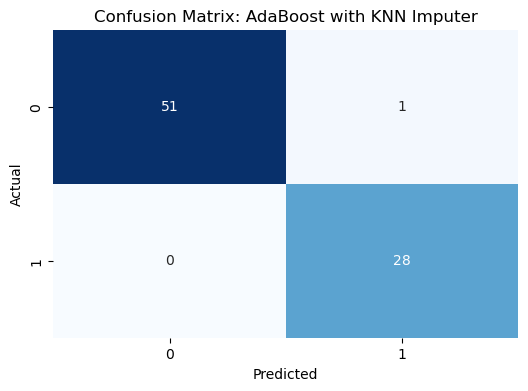

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


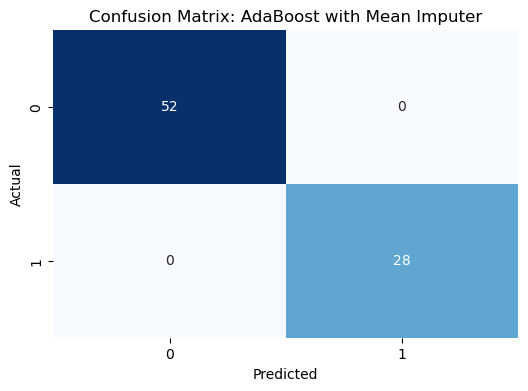

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


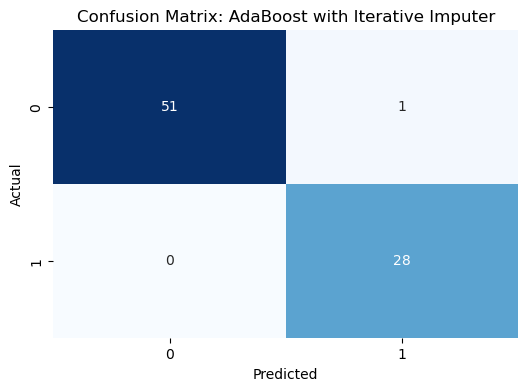

In [72]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example: Plot confusion matrices for AdaBoost with different imputation techniques
for method_name, datasets in imputation_methods.items():
    model = AdaBoostClassifier(random_state=42)
    model.fit(datasets["X_train"], y_train)
    y_pred = model.predict(datasets["X_test_full"])
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix: AdaBoost with {method_name}")

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


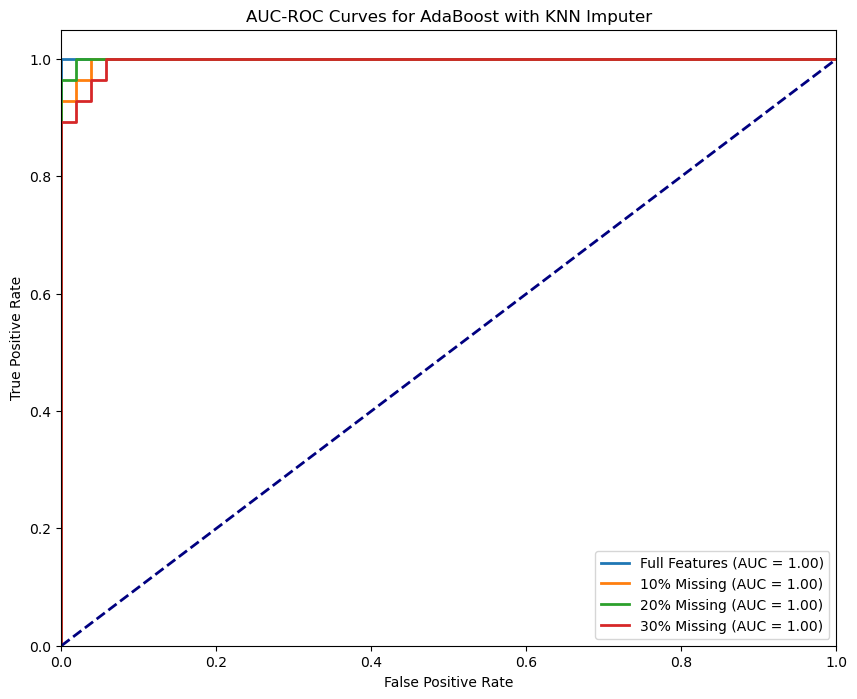

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


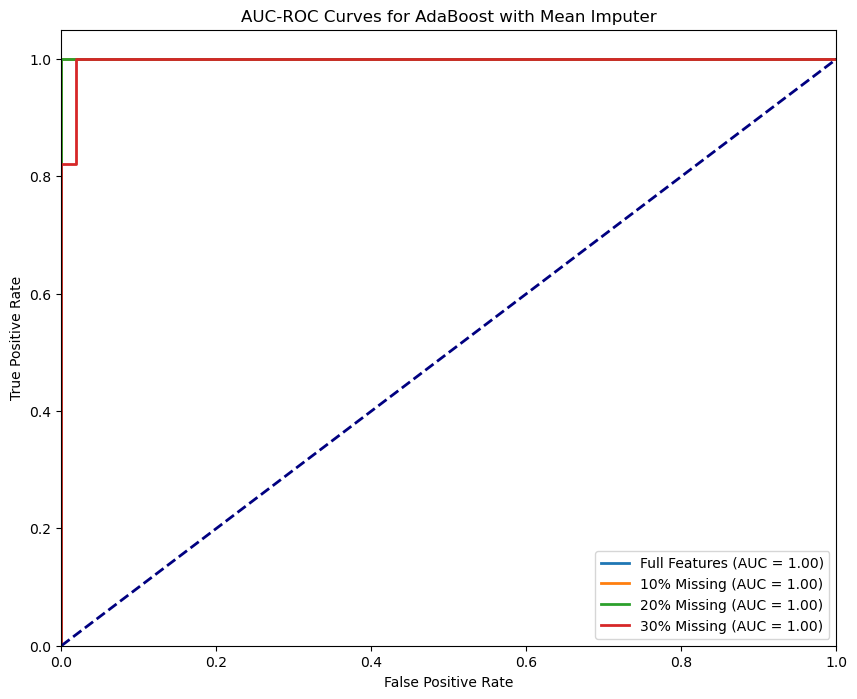

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


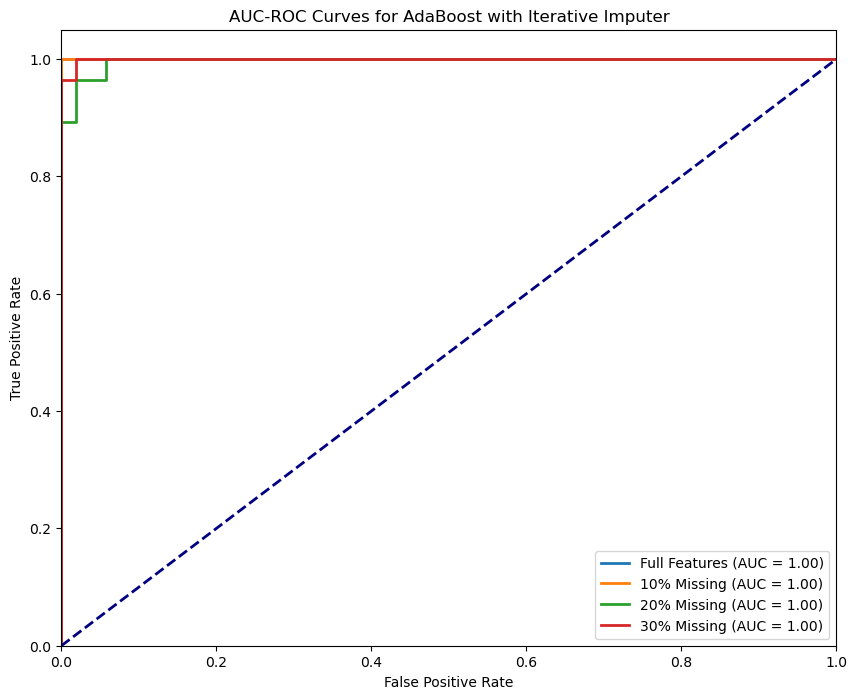

In [78]:
# Function to plot AUC-ROC for different levels of missingness
def plot_auc_roc(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Loop through each imputation method
for method_name, datasets in imputation_methods.items():
    plt.figure(figsize=(10, 8))
    model = AdaBoostClassifier(random_state=42)
    model.fit(datasets["X_train"], y_train)
    
    # Full features ROC
    y_pred_prob_full = model.predict_proba(datasets["X_test_full"])[:, 1]
    fpr_full, tpr_full, _ = roc_curve(y_test, y_pred_prob_full)
    roc_auc_full = auc(fpr_full, tpr_full)
    plot_auc_roc(fpr_full, tpr_full, roc_auc_full, "Full Features")
    
    # 10% missing ROC
    y_pred_prob_10 = model.predict_proba(datasets["X_test_10"])[:, 1]
    fpr_10, tpr_10, _ = roc_curve(y_test, y_pred_prob_10)
    roc_auc_10 = auc(fpr_10, tpr_10)
    plot_auc_roc(fpr_10, tpr_10, roc_auc_10, "10% Missing")
    
    # 20% missing ROC
    y_pred_prob_20 = model.predict_proba(datasets["X_test_20"])[:, 1]
    fpr_20, tpr_20, _ = roc_curve(y_test, y_pred_prob_20)
    roc_auc_20 = auc(fpr_20, tpr_20)
    plot_auc_roc(fpr_20, tpr_20, roc_auc_20, "20% Missing")
    
    # 30% missing ROC
    y_pred_prob_30 = model.predict_proba(datasets["X_test_30"])[:, 1]
    fpr_30, tpr_30, _ = roc_curve(y_test, y_pred_prob_30)
    roc_auc_30 = auc(fpr_30, tpr_30)
    plot_auc_roc(fpr_30, tpr_30, roc_auc_30, "30% Missing")
    
    # Finalize the plot for each imputation method
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC-ROC Curves for AdaBoost with {method_name}")
    plt.legend(loc="lower right")
    plt.show()


/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Imputation Method          Model  Full Features  10% Missing  20% Missing  \
0         KNN Imputer       AdaBoost         0.9875       0.9375       1.0000   
1         KNN Imputer       CatBoost         0.9875       0.9875       0.9875   
2         KNN Imputer     KNeighbors         0.8375       0.8500       0.8250   
3         KNN Imputer  Random Forest         1.0000       1.0000       0.9875   
4         KNN Imputer        XGBoost         0.9875       0.9750       1.0000   
5         KNN Imputer    Extra Trees         0.9875       1.0000       0.9750   
6        Mean Imputer       AdaBoost         1.0000       0.9875       1.0000   
7        Mean Imputer       CatBoost         0.9875       0.9875       0.9375   
8        Mean Imputer     KNeighbors         0.8875       0.8375       0.8375   
9        Mean Imputer  Random Forest         1.0000       0.9750       0.9250   
10       Mean Imputer        XGBoost         0.9875       0.9625       0.9125   
11       Mean Imputer    Ext

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


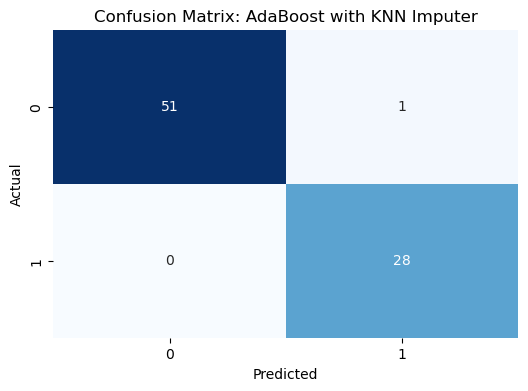

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


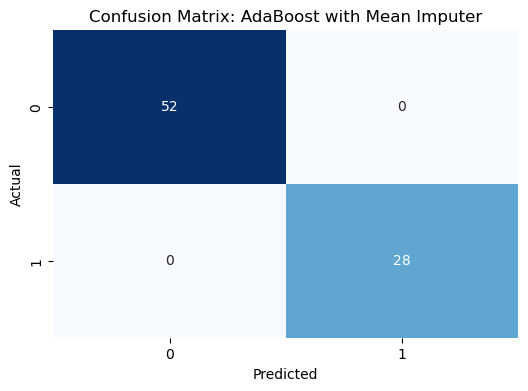

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


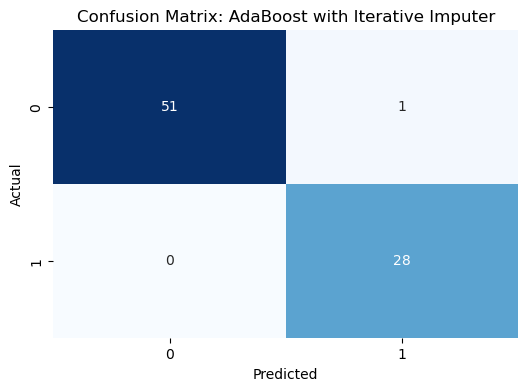

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


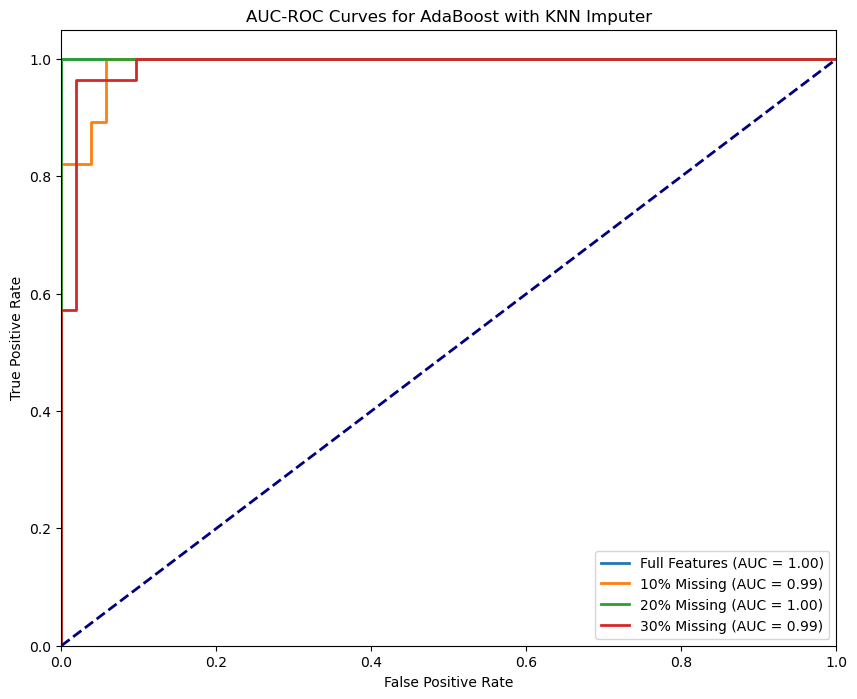

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


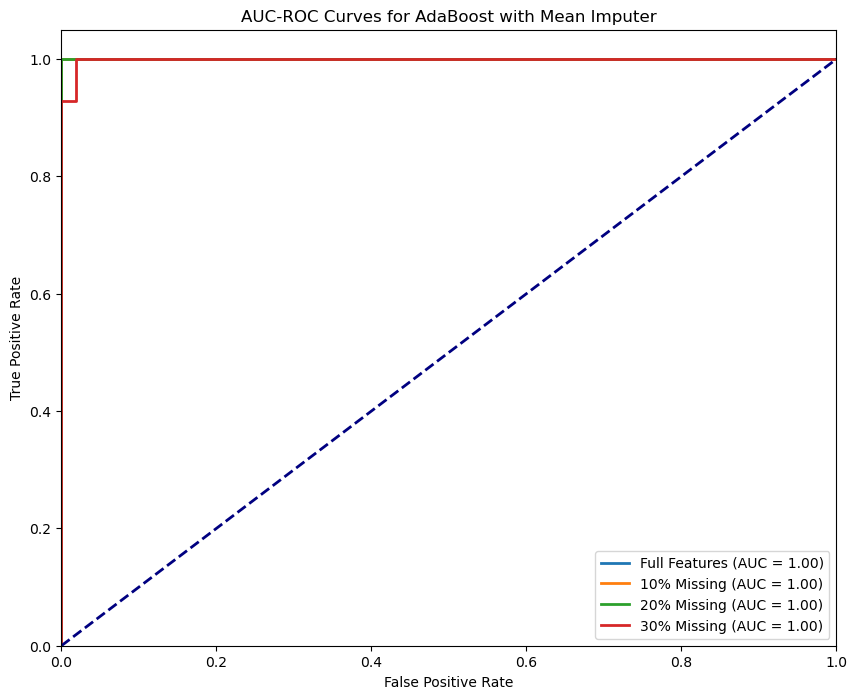

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


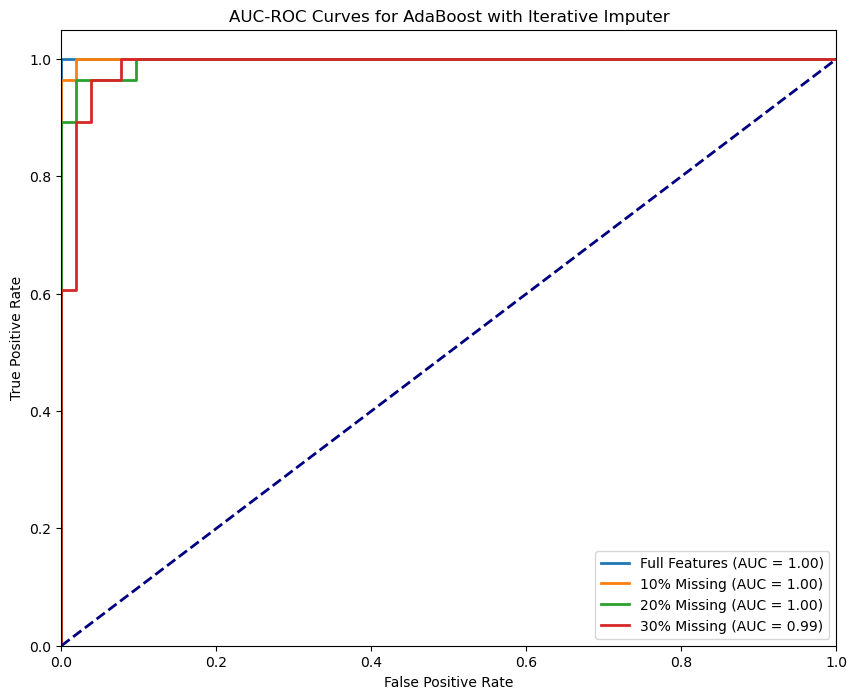

In [10]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# import xgboost as xgb
# from catboost import CatBoostClassifier
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# file_path = 'kidney.csv'
# df = pd.read_csv(file_path)

# # Clean categorical columns by replacing incorrect values
# df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
# df['cad'] = df['cad'].replace('\tno', 'no')
# df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# # Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
# df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# # Fill NaN values for categorical columns with the most frequent value (mode)
# cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# # Drop unnecessary column (e.g., 'id')
# df = df.drop('id', axis=1)

# # Rename columns to more descriptive names before defining X and y
# df.rename(columns={
#     'bp': 'blood_pressure',
#     'sg': 'specific_gravity',
#     'al': 'albumin',
#     'su': 'sugar',
#     'rbc': 'red_blood_cells',
#     'pc': 'pus_cell',
#     'pcc': 'pus_cell_clumps',
#     'ba': 'bacteria',
#     'bgr': 'blood_glucose_random',
#     'bu': 'blood_urea',
#     'sc': 'serum_creatinine',
#     'sod': 'sodium',
#     'pot': 'potassium',
#     'hemo': 'haemoglobin',
#     'pcv': 'packed_cell_volume',
#     'wc': 'white_blood_cell_count',
#     'rc': 'red_blood_cell_count',
#     'htn': 'hypertension',
#     'dm': 'diabetes_mellitus',
#     'cad': 'coronary_artery_disease',
#     'appet': 'appetite',
#     'pe': 'peda_edema',
#     'ane': 'anemia'
# }, inplace=True)

# # Separate features and target variable
# X = df.drop('classification', axis=1)
# y = df['classification']

# # Handle categorical variables by encoding them (if they are not numeric)
# X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# # Split the data into 80% training and 20% testing
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Function to randomly introduce missing values
# def introduce_missingness(X, missing_percent):
#     X_missing = X.copy()
#     missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
#     X_missing[missing_mask] = np.nan
#     return X_missing

# # Introduce 10%, 20%, and 30% missing values in the test set
# X_test_10_missing = introduce_missingness(X_test, 10)
# X_test_20_missing = introduce_missingness(X_test, 20)
# X_test_30_missing = introduce_missingness(X_test, 30)

# # Define imputing techniques
# knn_imputer = KNNImputer(n_neighbors=10)
# mean_imputer = SimpleImputer(strategy='mean')
# iterative_imputer = IterativeImputer(random_state=42)

# # Impute missing values in the training set for all methods
# X_train_knn = knn_imputer.fit_transform(X_train)
# X_train_mean = mean_imputer.fit_transform(X_train)
# X_train_iter = iterative_imputer.fit_transform(X_train)

# # Impute missing values in all test sets using all methods
# X_test_knn = knn_imputer.transform(X_test)
# X_test_mean = mean_imputer.transform(X_test)
# X_test_iter = iterative_imputer.transform(X_test)

# X_test_10_knn = knn_imputer.transform(X_test_10_missing)
# X_test_10_mean = mean_imputer.transform(X_test_10_missing)
# X_test_10_iter = iterative_imputer.transform(X_test_10_missing)

# X_test_20_knn = knn_imputer.transform(X_test_20_missing)
# X_test_20_mean = mean_imputer.transform(X_test_20_missing)
# X_test_20_iter = iterative_imputer.transform(X_test_20_missing)

# X_test_30_knn = knn_imputer.transform(X_test_30_missing)
# X_test_30_mean = mean_imputer.transform(X_test_30_missing)
# X_test_30_iter = iterative_imputer.transform(X_test_30_missing)

# # Organize the imputation methods
# imputation_methods = {
#     "KNN Imputer": {
#         "X_train": X_train_knn,
#         "X_test_full": X_test_knn,
#         "X_test_10": X_test_10_knn,
#         "X_test_20": X_test_20_knn,
#         "X_test_30": X_test_30_knn
#     },
#     "Mean Imputer": {
#         "X_train": X_train_mean,
#         "X_test_full": X_test_mean,
#         "X_test_10": X_test_10_mean,
#         "X_test_20": X_test_20_mean,
#         "X_test_30": X_test_30_mean
#     },
#     "Iterative Imputer": {
#         "X_train": X_train_iter,
#         "X_test_full": X_test_iter,
#         "X_test_10": X_test_10_iter,
#         "X_test_20": X_test_20_iter,
#         "X_test_30": X_test_30_iter
#     }
# }

# # Define models
# models = {
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
#     "KNeighbors": KNeighborsClassifier(n_neighbors=5),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": xgb.XGBClassifier(random_state=42),
#     "Extra Trees": ExtraTreesClassifier(random_state=42)
# }

# # Store results for each imputation method
# results = []
# for method_name, datasets in imputation_methods.items():
#     for model_name, model in models.items():
#         model.fit(datasets["X_train"], y_train)
        
#         # Get accuracies for full features and different levels of missingness
#         acc_full = accuracy_score(y_test, model.predict(datasets["X_test_full"]))
#         acc_10 = accuracy_score(y_test, model.predict(datasets["X_test_10"]))
#         acc_20 = accuracy_score(y_test, model.predict(datasets["X_test_20"]))
#         acc_30 = accuracy_score(y_test, model.predict(datasets["X_test_30"]))
        
#         # Append results
#         results.append({
#             "Imputation Method": method_name,
#             "Model": model_name,
#             "Full Features": acc_full,
#             "10% Missing": acc_10,
#             "20% Missing": acc_20,
#             "30% Missing": acc_30
#         })

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)
# results_df

# # Function to plot confusion matrix
# def plot_confusion_matrix(y_true, y_pred, title):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#     plt.title(title)
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

# # Example: Plot confusion matrices for AdaBoost with different imputation techniques
# for method_name, datasets in imputation_methods.items():
#     model = AdaBoostClassifier(random_state=42)
#     model.fit(datasets["X_train"], y_train)
#     y_pred = model.predict(datasets["X_test_full"])
#     plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix: AdaBoost with {method_name}")

# # Function to plot AUC-ROC for different levels of missingness
# def plot_auc_roc(fpr, tpr, roc_auc, label):
#     plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# # Loop through each imputation method
# for method_name, datasets in imputation_methods.items():
#     plt.figure(figsize=(10, 8))
#     model = AdaBoostClassifier(random_state=42)
#     model.fit(datasets["X_train"], y_train)
    
#     # Full features ROC
#     y_pred_prob_full = model.predict_proba(datasets["X_test_full"])[:, 1]
#     fpr_full, tpr_full, _ = roc_curve(y_test, y_pred_prob_full)
#     roc_auc_full = auc(fpr_full, tpr_full)
#     plot_auc_roc(fpr_full, tpr_full, roc_auc_full, "Full Features")
    
#     # 10% missing ROC
#     y_pred_prob_10 = model.predict_proba(datasets["X_test_10"])[:, 1]
#     fpr_10, tpr_10, _ = roc_curve(y_test, y_pred_prob_10)
#     roc_auc_10 = auc(fpr_10, tpr_10)
#     plot_auc_roc(fpr_10, tpr_10, roc_auc_10, "10% Missing")
    
#     # 20% missing ROC
#     y_pred_prob_20 = model.predict_proba(datasets["X_test_20"])[:, 1]
#     fpr_20, tpr_20, _ = roc_curve(y_test, y_pred_prob_20)
#     roc_auc_20 = auc(fpr_20, tpr_20)
#     plot_auc_roc(fpr_20, tpr_20, roc_auc_20, "20% Missing")
    
#     # 30% missing ROC
#     y_pred_prob_30 = model.predict_proba(datasets["X_test_30"])[:, 1]
#     fpr_30, tpr_30, _ = roc_curve(y_test, y_pred_prob_30)
#     roc_auc_30 = auc(fpr_30, tpr_30)
#     plot_auc_roc(fpr_30, tpr_30, roc_auc_30, "30% Missing")
    
#     # Finalize the plot for each imputation method
#     plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title(f"AUC-ROC Curves for AdaBoost with {method_name}")
#     plt.legend(loc="lower right")
#     plt.show()


## Explainability

In [32]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Assume model is trained and X_test is prepared
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_imputed)

if isinstance(shap_values, list):
    shap_values_class_0 = shap_values[0]  # SHAP values for class 0
    shap_values_class_1 = shap_values[1]  # SHAP values for class 1
else:
    # For a 3D array
    shap_values_class_0 = shap_values[:, :, 0]  # SHAP values for class 0
    shap_values_class_1 = shap_values[:, :, 1]  # SHAP values for class 1


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [33]:
feature_names = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia']

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


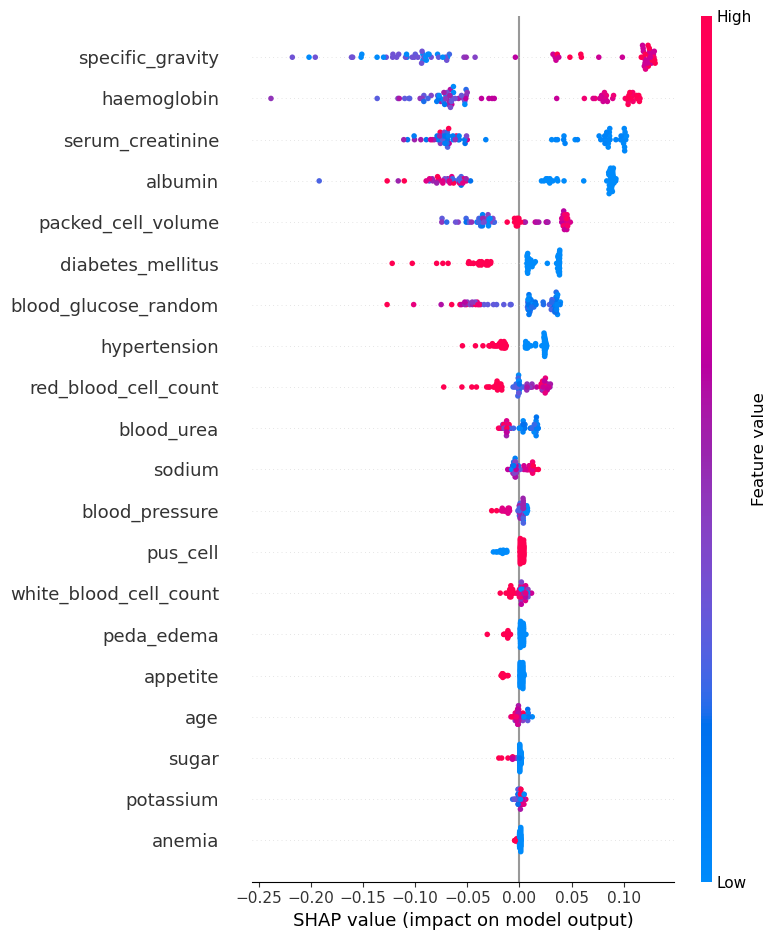

In [34]:
shap.summary_plot(shap_values_class_1, X_test_imputed, feature_names=feature_names)


SHAP values are in a list format:
Shape of SHAP values for class 0: (80, 24)
Shape of SHAP values for class 1: (80, 24)


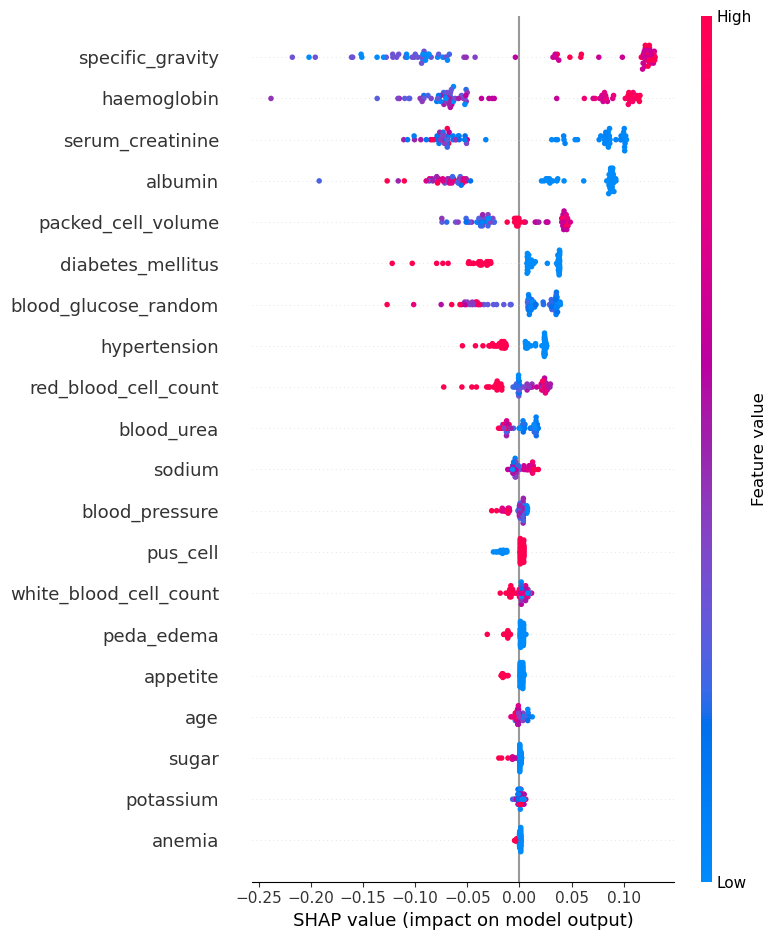

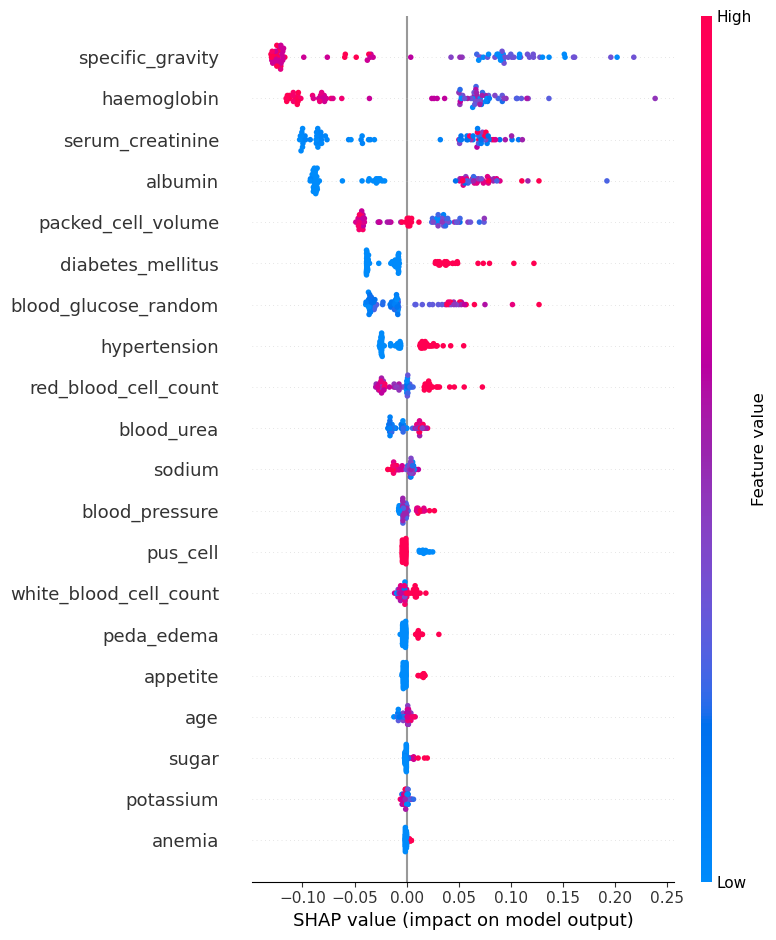

In [35]:

# Check the type of SHAP values and print their shape
if isinstance(shap_values, list):
    print("SHAP values are in a list format:")
    for i, sv in enumerate(shap_values):
        print(f"Shape of SHAP values for class {i}: {sv.shape}")  # Print the shape for each class
else:
    print("SHAP values are in a multi-dimensional array format:")
    print(f"Shape of SHAP values: {shap_values.shape}")

# Now we can access the SHAP values based on their format
if isinstance(shap_values, list):
    shap_values_class_0 = shap_values[0]  # For class 0
    shap_values_class_1 = shap_values[1]  # For class 1
else:
    shap_values_class_0 = shap_values[:, :, 0]  # For class 0
    shap_values_class_1 = shap_values[:, :, 1]  # For class 1


# Plot SHAP summary for class 1 (Non-CKD)
shap.summary_plot(shap_values_class_1, X_test_imputed, feature_names=feature_names)

# Optionally, plot SHAP summary for class 0 (CKD)
shap.summary_plot(shap_values_class_0, X_test_imputed, feature_names=feature_names)



In [36]:
class_names = ['CKD', 'Non_CKD']

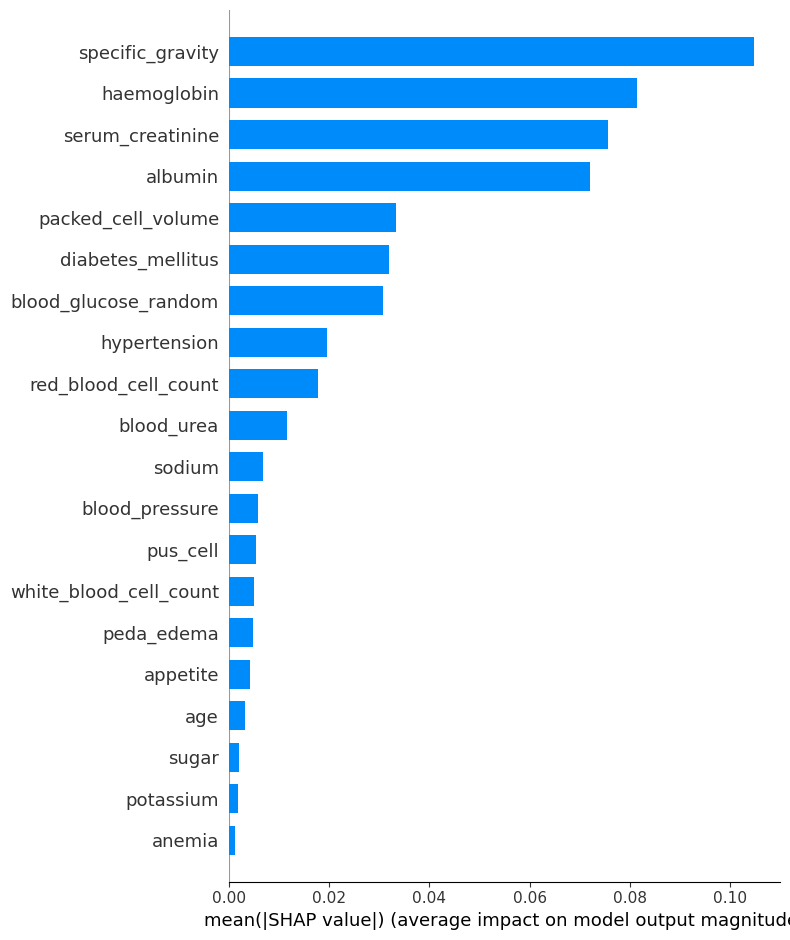

In [37]:
# Summary plot using bar plot style (feature names will be displayed automatically)
shap.summary_plot(shap_values_class_1,  X_test_imputed, feature_names = feature_names, class_names =class_names, plot_type="bar")

In [38]:
# Example input for a new patient with some features missing (use np.nan for missing features)
new_patient_input = {
    'age': 10,                   # Example value
    'blood_pressure': 80,        # Example value (bp)
    'specific_gravity': 0.020,   # Example value (sg)
    'albumin': np.nan,           # Missing value (al)
    'sugar': 0,                  # Example value (su)
    'red_blood_cells': 'normal', # Example value (rbc) (should be converted)
    'pus_cell': 'normal',        # Example value (pc) (should be converted)
    'pus_cell_clumps': 'no',     # Example value (pcc) (should be converted)
    'bacteria': 'no',            # Example value (ba) (should be converted)
    'blood_glucose_random': 120,  # Example value (bgr)
    'blood_urea': 50,            # Example value (bu)
    'serum_creatinine': np.nan,   # Missing value (sc)
    'sodium': 118,               # Example value (sod)
    'potassium': 4.5,            # Example value (pot)
    'haemoglobin': 15,           # Example value (hemo)
    'packed_cell_volume': 25,    # Example value (pcv)
    'white_blood_cell_count': 6.5,# Example value (wc)
    'red_blood_cell_count': 5.5, # Example value (rc)
    'hypertension': 'no',        # Example value (htn) (should be converted)
    'diabetes_mellitus': 'no',   # Example value (dm) (should be converted)
    'coronary_artery_disease': 'no',  # Example value (cad) (should be converted)
    'appetite': 'good',          # Example value (appet) (should be converted)
    'peda_edema': 'no',          # Example value (pe) (should be converted)
    'anemia': 'no'               # Example value (ane) (should be converted)
}

# Mapping function to convert categorical string values to numeric
def map_categorical_to_numeric(value):
    if value == 'normal':
        return 1
    elif value == 'abnormal':
        return 0
    elif value == 'yes':
        return 1
    elif value == 'no':
        return 0
    elif value == 'good':
        return 0
    elif value == 'poor':
        return 1
    elif value == 'present':
        return 1
    elif value == 'not present':
        return 0
    else:
        return np.nan  # Handle other cases as NaN

# Convert the patient input to a DataFrame
new_patient_df = pd.DataFrame([new_patient_input])

# Apply the mapping function to categorical columns
categorical_columns = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 
                       'bacteria', 'hypertension', 'diabetes_mellitus', 
                       'coronary_artery_disease', 'appetite', 'peda_edema', 
                       'anemia']

for col in categorical_columns:
    new_patient_df[col] = new_patient_df[col].apply(map_categorical_to_numeric)

# Initialize the KNN imputer using the training data
knn_imputer = KNNImputer(n_neighbors=3)

# Fit the imputer on the training data
knn_imputer.fit(X_train)  # Fit the imputer on the training data

# Impute missing values using the KNN imputer on the new patient data
new_patient_imputed = knn_imputer.transform(new_patient_df)

# Make a prediction using the trained model
predicted_class = model.predict(new_patient_imputed)

# Get the probability scores for each class
predicted_probabilities = model.predict_proba(new_patient_imputed)

# Extract the probabilities for the positive class (assuming 1 is the positive class)
positive_class_probability = predicted_probabilities[0][1]  # Probability of class 1 (Non-CKD)
negative_class_probability = predicted_probabilities[0][0]  # Probability of class 0 (CKD)

# Convert predicted class back to label (assuming 0 is 'ckd' and 1 is 'not ckd')
predicted_label = 'not ckd' if predicted_class[0] == 1 else 'ckd'

# Define important features that are critical for prediction
important_features = ['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin', 'packed_cell_volume']

# Check if important features are missing in the new patient input
missing_features = [feature for feature in important_features if new_patient_df[feature].isna().any()]

# Display the result
print(f'The predicted class for the new patient is: {predicted_label}')
print(f'Probability of being Non-CKD (positive class): {positive_class_probability:.2f}')
print(f'Probability of being CKD (negative class): {negative_class_probability:.2f}')

# Check for missing important features and give a cautionary alert
if missing_features:
    print("⚠️ Warning: The following important features are missing:")
    for feature in missing_features:
        print(f"- {feature}")
    print("Even though we provide you with prediction results, please note that having these tests is crucial for accurate diagnosis.")


The predicted class for the new patient is: ckd
Probability of being Non-CKD (positive class): 0.03
Probability of being CKD (negative class): 0.97
⚠️ Warning: The following important features are missing:
- serum_creatinine
- albumin
Even though we provide you with prediction results, please note that having these tests is crucial for accurate diagnosis.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle


In [ ]:
# Save the model to a pkl file
with open('kideny_rf.pkl', 'wb') as file:
    pickle.dump(model, file)


False Positive Rates: [0.  0.  0.  0.5 0.5 1. ]
True Positive Rates: [0.  0.2 0.8 0.8 1.  1. ]
Thresholds: [ inf 0.9  0.6  0.4  0.35 0.1 ]


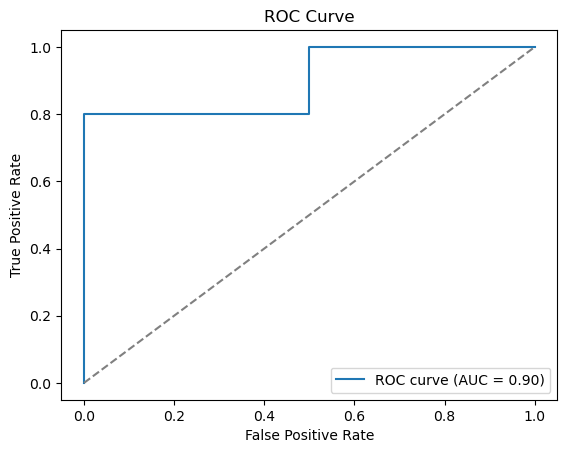

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample true labels and predicted probabilities
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1]
y_pred_proba = [0.1, 0.9, 0.8, 0.4, 0.35, 0.3, 0.85, 0.5, 0.6]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Display the values
print("False Positive Rates:", fpr)
print("True Positive Rates:", tpr)
print("Thresholds:", thresholds)

# Plot the ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
